<a href="https://colab.research.google.com/github/vinuthnachilukuri/AIML-Lab/blob/main/AIML_LAB_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name = 'car', version = 2, parser = 'auto')

In [ ]:
type(car_data)

sklearn.utils._bunch.Bunch

In [ ]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [ ]:
car_data.details['version']

'2'

In [ ]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
print(car_data.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

Binarized version of the original data set (see version 1). The multi-class target feature is converted to a two-class nominal target feature by re-labeling the majority class as positive ('P') and all others as negative ('N'). Originally converted by Quan Sun.

Downloaded from openml.org.


In [ ]:
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [ ]:
type(car_data)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(car_data, test_size = 0.3, random_state = 20)
print('The size of training data is: {}\n The size of testing data is: {}'.format(len(train_data),len(test_data)))

The size of training data is: 1209
 The size of testing data is: 519


In [ ]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


In [ ]:
train_data.isnull().sum()

buying         0
maint          0
doors          0
persons        0
lug_boot       0
safety         0
binaryClass    0
dtype: int64

In [ ]:
train_data['buying'].value_counts()

med      327
high     307
vhigh    291
low      284
Name: buying, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

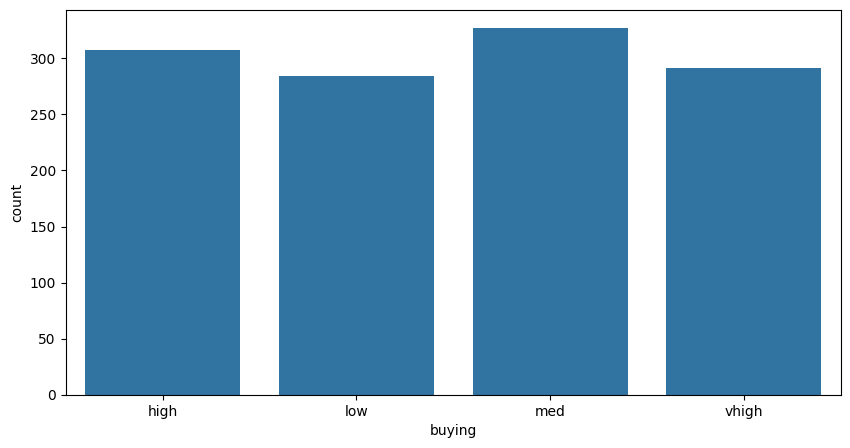

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = train_data, x = 'buying')

In [ ]:
train_data['doors'].value_counts()

5more    319
2        312
4        296
3        282
Name: doors, dtype: int64

<Axes: xlabel='doors', ylabel='count'>

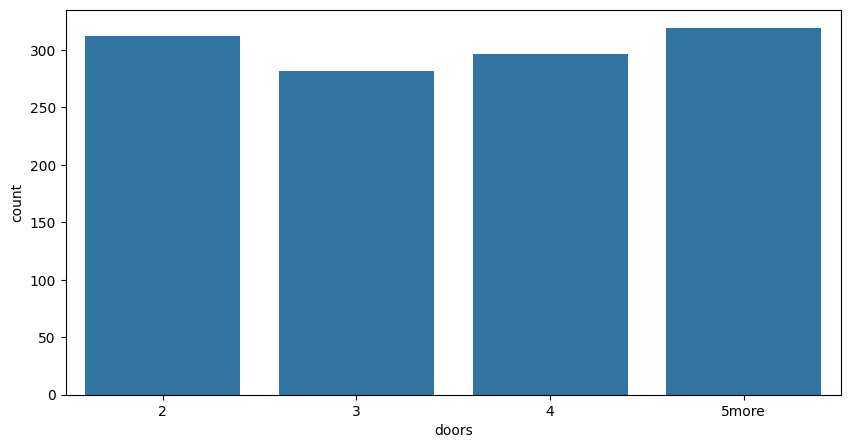

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = train_data, x = 'doors')

In [ ]:
train_data['maint'].value_counts()

high     311
med      311
vhigh    294
low      293
Name: maint, dtype: int64

<Axes: xlabel='maint', ylabel='count'>

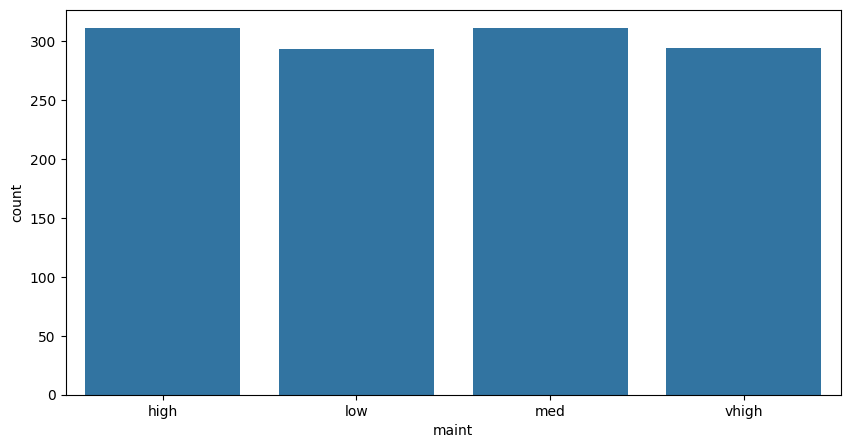

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = train_data, x = 'maint')

<Axes: xlabel='buying', ylabel='count'>

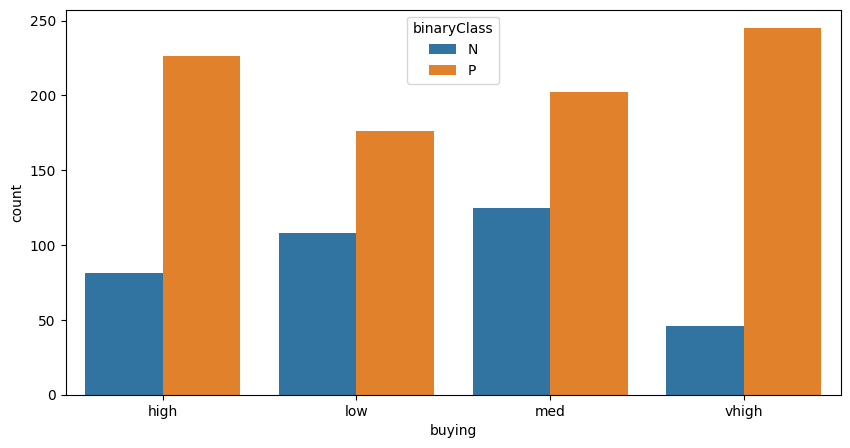

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = train_data, x = 'buying', hue = 'binaryClass')

<Axes: xlabel='doors', ylabel='count'>

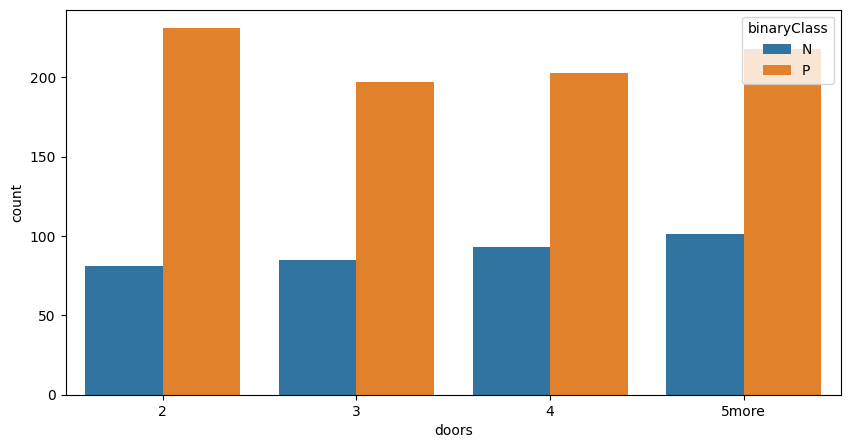

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = train_data, x = 'doors', hue = 'binaryClass')

<Axes: xlabel='maint', ylabel='count'>

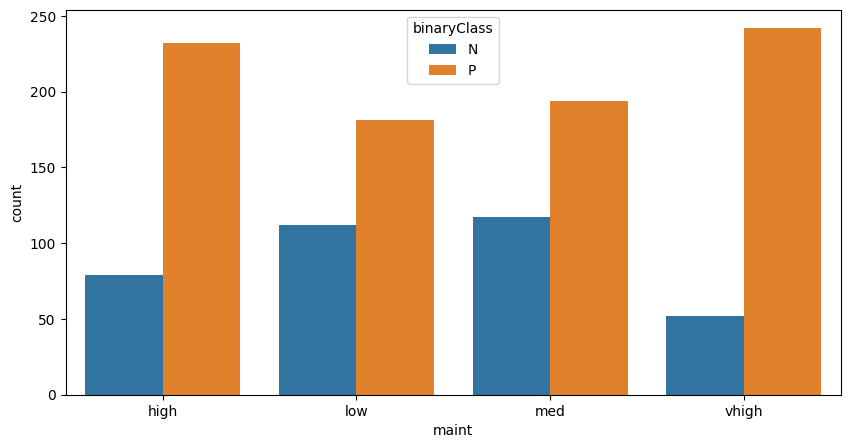

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = train_data, x = 'maint', hue = 'binaryClass')

In [ ]:
train_data['persons'].value_counts()

more    418
2       407
4       384
Name: persons, dtype: int64

<Axes: xlabel='persons', ylabel='count'>

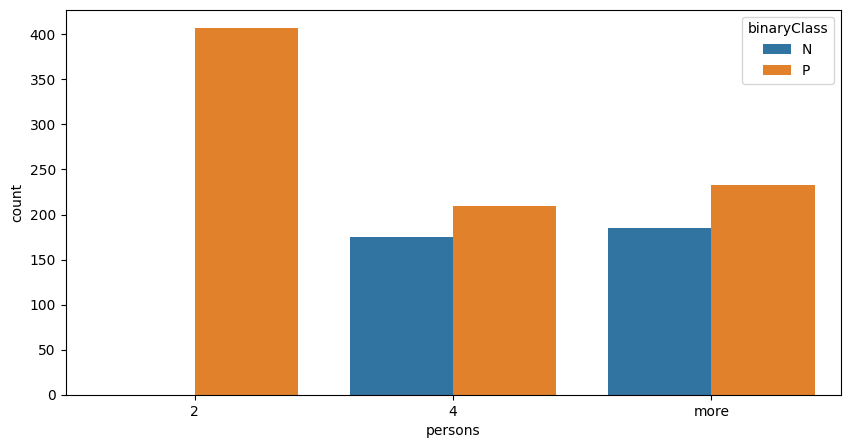

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = train_data, x = 'persons', hue = 'binaryClass')

In [ ]:
train_data['lug_boot'].value_counts()

big      411
med      405
small    393
Name: lug_boot, dtype: int64

<Axes: xlabel='lug_boot', ylabel='count'>

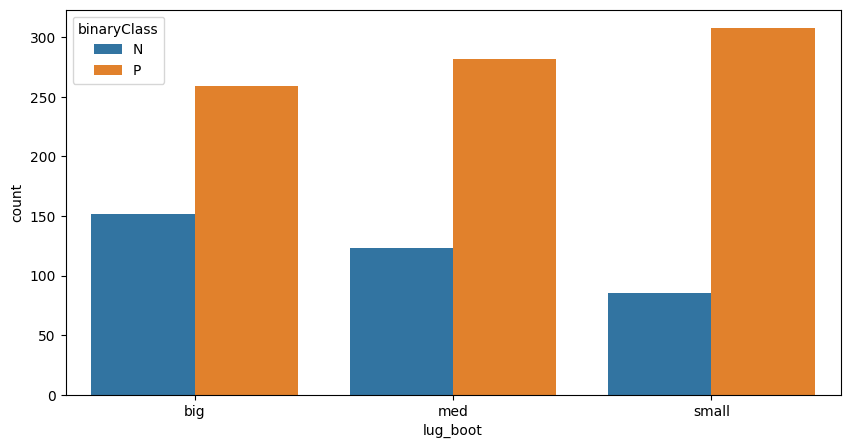

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = train_data, x = 'lug_boot', hue = 'binaryClass')

In [ ]:
train_data['safety'].value_counts()

med     406
low     402
high    401
Name: safety, dtype: int64

<Axes: xlabel='safety', ylabel='count'>

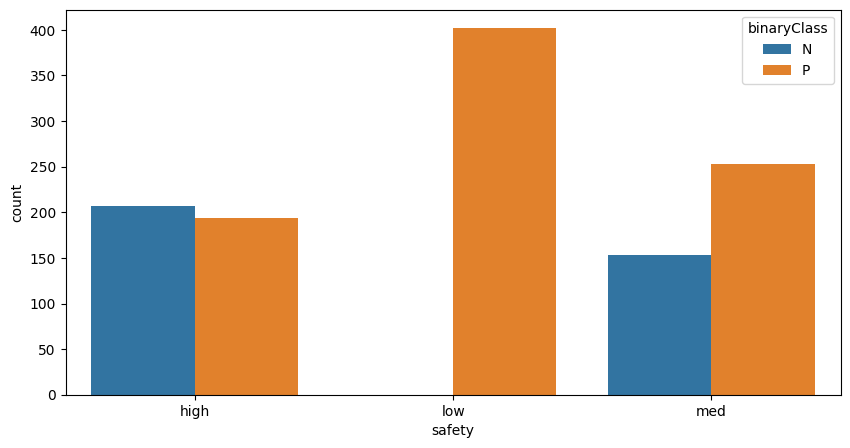

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(data = train_data, x = 'safety', hue = 'binaryClass')

In [ ]:
car_train = train_data.drop('binaryClass', axis = 1)
car_labels =  train_data[['binaryClass']]

In [ ]:
pipe = Pipeline([('ord_enc', OrdinalEncoder())])
car_train_prepared = pipe.fit_transform(car_train)

In [ ]:
label_enc = LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

In [ ]:
def accuracy(input_data, model, labels):
  preds = model.predict(input_data)
  acc = accuracy_score(labels, preds)
  return acc

In [ ]:
def conf_matrix(input_data, model, labels):
  preds = model.predict(input_data)
  cm = confusion_matrix(labels, preds)
  return cm

In [ ]:
def class_report(input_data, model, labels):
  preds = model.predict(input_data)
  report = classification_report(labels,preds)
  report = print(report)
  return report

In [ ]:
accuracy(car_train_prepared, tree_clf, car_labels_prepared)

1.0

In [ ]:
conf_matrix(car_train_prepared, tree_clf, car_labels_prepared)

array([[360,   0],
       [  0, 849]])

In [ ]:
class_report(car_train_prepared, tree_clf, car_labels_prepared)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       360
           1       1.00      1.00      1.00       849

    accuracy                           1.00      1209
   macro avg       1.00      1.00      1.00      1209
weighted avg       1.00      1.00      1.00      1209

